## Load Images

In [ ]:
from IPython.display import Image
from matplotlib import pyplot as plt
import pandas as pd, numpy as np

import io

import warnings
warnings.simplefilter("ignore")
import os, cv2

os.chdir(r'/content/ocr_images')

fileList = [x for x in os.listdir() if 'jpg'  in x.lower()]
fileList[:9]

['sd19.jpg',
 '2.jpg',
 '10.jpg',
 '11.jpg',
 '7.jpg',
 '4.jpg',
 '5.jpg',
 'receipt1.jpg',
 '3.jpg']

## Qwen-VL-Chat-Int4 (Qwen Large Vision Language Model) for more optimized extraction of text

In [ ]:
!pip install tiktoken einops transformers_stream_generator diffusers accelerate
!pip install optimum
!pip install auto-gptq
!git clone https://github.com/JustinLin610/AutoGPTQ.git & cd AutoGPTQ
!pip install -v

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 39.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
torch.manual_seed(1234)

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen-VL-Chat-Int4", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen-VL-Chat-Int4", device_map="cuda", trust_remote_code=True).eval()

tokenizer_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

tokenization_qwen.py:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL-Chat-Int4:
- tokenization_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


qwen.tiktoken:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

SimSun.ttf:   0%|          | 0.00/10.5M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

configuration_qwen.py:   0%|          | 0.00/2.09k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL-Chat-Int4:
- configuration_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_qwen.py:   0%|          | 0.00/44.7k [00:00<?, ?B/s]

visual.py:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL-Chat-Int4:
- visual.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


qwen_generation_utils.py:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL-Chat-Int4:
- qwen_generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-VL-Chat-Int4:
- modeling_qwen.py
- visual.py
- qwen_generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/126k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.78G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/221 [00:00<?, ?B/s]

## Using Google Gemini Model's API to extract text from images

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
import pathlib
import textwrap
import PIL.Image
from matplotlib import pyplot as plt
from keras.preprocessing import image
import numpy as np
from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Using both the models for inference

In [ ]:
gem_model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
def ocr_output(image_name):

    image_filename = image_name
    image_path = os.path.join('/content/ocr_images', image_filename)
    img = PIL.Image.open(image_path)

    img_dis = image.load_img(image_path, target_size=(300,300))

    plt.imshow(img_dis)
    plt.axis('off')
    plt.show()

    response = gem_model.generate_content(["You are an Optical Character Recognizer expert and your job is to parse, detect, recognize text from the following OCR image and convert it to text. Extract the handwritten and also Extract the printed text in the image.  Return both extracted text in the same order as in the image if it is a form or receipt. No need to specify if the text is handwritten or printed ", img], stream=False)
    response.resolve()
    # print(response)

    if response.parts == '':
        query = tokenizer.from_list_format([
          {'image': image_path},
          {'text': 'Can you extract each and every text from the image in the same order without adding any words that are not there in the image?'},
        ])
        response, history = model.chat(tokenizer, query=query, history=None)
        print("\n")
        print(response)
        print("\n")
    else:
        print("\n")
        print(response.text)
        print("\n")

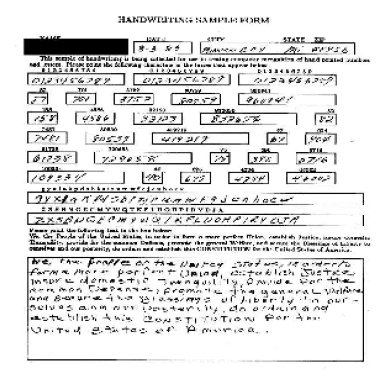



 Handwritten Text: 

8-3-89
MIDEN CITY MI 48952
0123456789
0123456789
0123456789
158                        82
5710                      904
7481                     67
61738                     75
109334                   40
ZXSBNEGCMWYQTKFLUOHPVRJDUA
XZSBUGECKYWXTKFLUOHPIRVDUA

Printed Text: 

HANDWRITING SAMPLE FORM
NAME: __________________________ DATE: _____________________ STATE: _____ ZIP: __________

This sample of handwriting is being collected for use in testing computer recognition of hand printed numbers and letters. Please print the following characters in the boxes that appear below.
0 1 2 3 4 5 6 7 8 9
0 1 2 3 4 5 6 7 8 9
0 1 2 3 4 5 6 7 8 9

67
3752
80579
960941
4586
32123
832656
7481
80539
419219
61738
729658
675
390
5716
4234
46002

We, the People of the United States, in order to form a more perfect Union, establish Justice, insure domestic Tranquility, provide for the common defense, promote the general Welfare, and secure the Blessings of Liberty to ourselves and

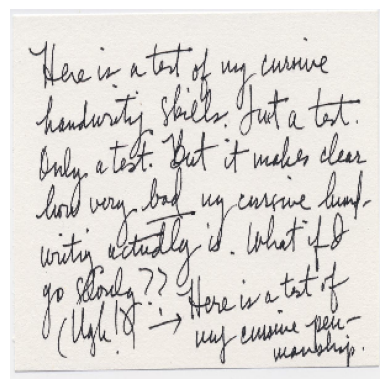



 Here is a test of my cursive handwriting skills. Just a test. Only a test. But it makes clear how very bad my cursive handwriting actually is. What if I go slowly? 

(Ugh!) Here is a test of my cursive penmanship.




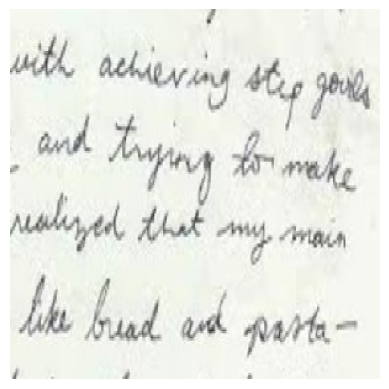



 with achieving step goals and trying to make realized that my main like bread and pasta -




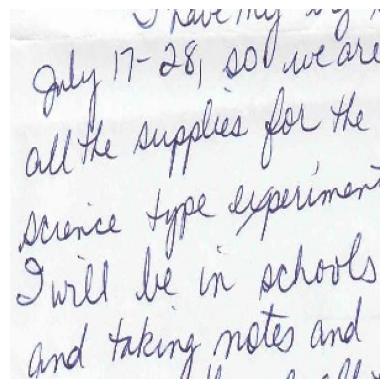



 July 17-28, so we are all the supplies for the science type experiment I will be in schools and taking notes and




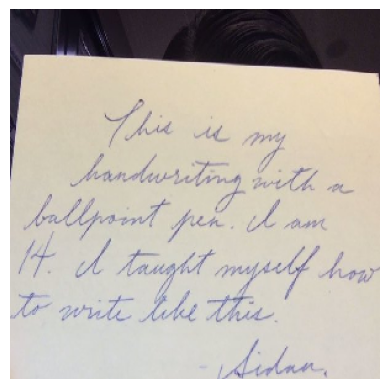



 This is my handwriting with a ballpoint pen. I am 14. I taught myself how to write like this.
-Aidan




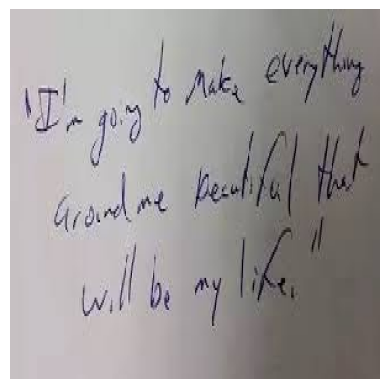



 I'm going to make everything around me beautiful that will be my life.




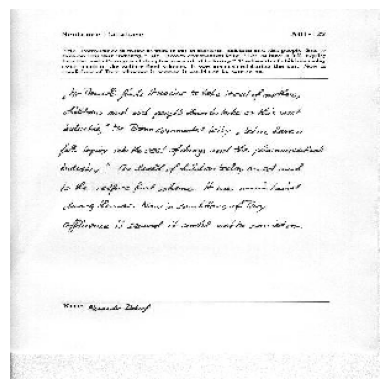



 Mr. Powell finds it easier to tax it out of mothers, children, and sick people than to take it from the corporations and rich people that are the cause of the trouble. Mr. Drews commented that as long as the pharmaceutical industry is permitted to maintain its present folly there can be no solution to the health of children today and tomorrow. Dr. Born commanded icity. "Let us have a fall injury into the cost of development and the pharmaceutical industry." The health of children today and the pharmaceutical industry is a pet scheme. It was brain-dead during the war. Now in conditions of "they" difference it seemed it could not be carried on. 
Name: Alexander Drebuf




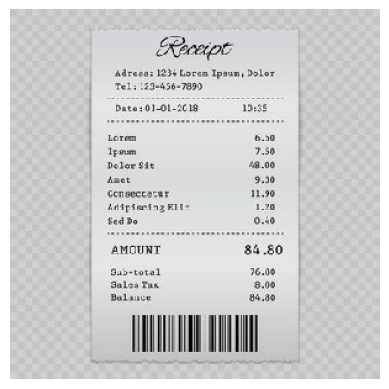



 **Handwritten:**
Receipt
Address: 1234 Lorem Ipsum, Dolor
Tel: 123-456-7890
Date: 01-01-2018 10:35

**Printed:**
Lorem 6.50
Ipsum 7.50
Dolor Stc 48.00
Amet 9.30
Consectetur 11.90
Adipiscing Elit 1.20
Sed Do 0.40
----------------
Amount 84.80
Sub-total 76.80
Sales Tax 8.00
Balance 84.80




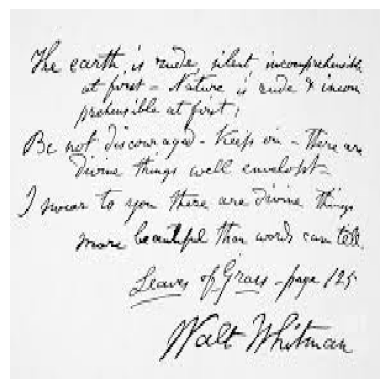



Sure, here's the text from the image in the same order without any additional words:




In [ ]:
for i in range(9):
    ocr_output(fileList[i])

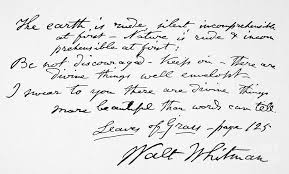

In [ ]:
img = PIL.Image.open('/content/ocr_images/3.jpg')
img

In [ ]:
img_f = '3.jpg'
image_p = os.path.join('/content/ocr_images', img_f)
query = tokenizer.from_list_format([
    {'image': image_p},
    {'text': 'Can you extract each and every text from the image in the same order without adding any words that are not there in the image?'},
])
response, history = model.chat(tokenizer, query=query, history=None)
print(response)

The earth is really quite plant comprehensible out here. Picture is made. Removable at night. Keep on. There are Be hot. Resort. Daring things! I want to give you there are more beautiful things than words. Walt Whitman. Leave of Grass. Page 125.


In [ ]:
to_markdown(response)

> The earth is really quite plant comprehensible out here. Picture is made. Removable at night. Keep on. There are Be hot. Resort. Daring things! I want to give you there are more beautiful things than words. Walt Whitman. Leave of Grass. Page 125.

In the last image some of the text are not extracted properly because of the quality of the image.

There are also various paid API's like ChatGPT-4-turbo and Google Cloud's Vision that can be more efficient for OCR that has handwritten text. Otherwise for printed text libraries, like Pytessaract and EasyOCR also works great.